# Quick Check

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
vehicle_order = ['zero', '1', '2', '3_plus', 'GQ']

## HH by Veh by MPO

input

In [23]:
csv_data = r'.\data\mpo_veh_Nhh_0813.csv'

### counts

In [24]:
df = pd.read_csv(csv_data)
vehicle_order = ['zero', '1', '2', '3_plus', 'GQ']
df['vehicles'] = pd.Categorical(df['vehicles'], categories=vehicle_order, ordered=True)

pivot_df = df.pivot_table(index='mpo', columns='vehicles', values='num_households', fill_value=0)

In [25]:
pivot_df

vehicles,zero,1,2,3_plus,GQ
mpo,,,,,
BRMPO,204328,494862,435624,180681,117663
BRPC,5051,21589,21134,8694,6098
CCC,4858,34073,40709,21545,2759
CMRPC,21306,76243,85891,47200,20348
FRCOG,2238,10969,12392,5559,1525
MRPC,6793,32593,37754,21756,7787
MVC,334,2507,2473,2291,241
MVPC,11607,46396,51219,27980,6153
NMCOG,8487,35587,44644,24984,6886


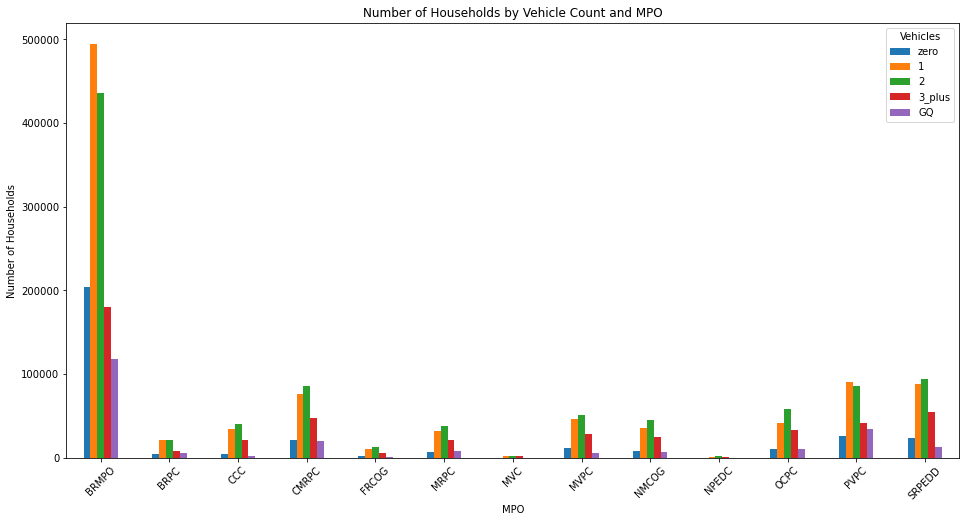

In [26]:

pivot_df.plot(kind='bar', figsize=(16, 8))
plt.title('Number of Households by Vehicle Count and MPO')
plt.xlabel('MPO')
plt.ylabel('Number of Households')
plt.xticks(rotation=45)  # Rotates the MPO labels to avoid overlap
plt.legend(title='Vehicles')
# plt.tight_layout() 

plt.show()


### percentage (excl. GQ)

In [27]:

df = pd.read_csv(csv_data)

# Define a custom order for the 'vehicles' column excluding 'GQ'
vehicle_order = ['zero', '1', '2', '3_plus']
df['vehicles'] = pd.Categorical(df['vehicles'], categories=vehicle_order, ordered=True)

# Filter out 'GQ' entries
df = df[df['vehicles'] != 'GQ']

# Pivot the table to prepare for grouped percentage calculation
pivot_df = df.pivot_table(index='mpo', columns='vehicles', values='num_households', aggfunc='sum', fill_value=0)

# Convert numbers to percentages within each MPO
pivot_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

pivot_df

vehicles,zero,1,2,3_plus
mpo,,,,
BRMPO,15.532404,37.617931,33.114835,13.734830
BRPC,8.944889,38.232273,37.426507,15.396331
CCC,4.801107,33.673964,40.232248,21.292682
CMRPC,9.237773,33.057145,37.240288,20.464794
FRCOG,7.182746,35.204442,39.771487,17.841325
MRPC,6.868832,32.956844,38.175457,21.998867
MVC,4.391847,32.965155,32.518080,30.124918
MVPC,8.459789,33.815834,37.331088,20.393289
NMCOG,7.464249,31.298482,39.264041,21.973228


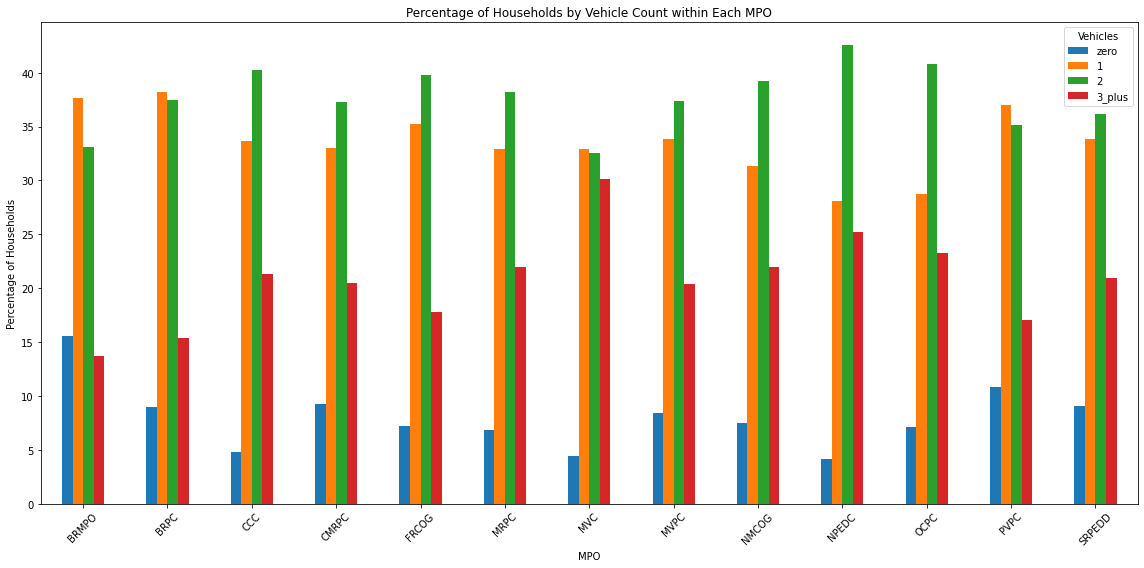

In [28]:

# Plotting the grouped bar chart in percentage
pivot_df.plot(kind='bar', figsize=(16, 8)) #, colormap='viridis')
plt.title('Percentage of Households by Vehicle Count within Each MPO')
plt.xlabel('MPO')
plt.ylabel('Percentage of Households')
plt.xticks(rotation=45)
plt.legend(title='Vehicles')
plt.tight_layout()

# Display the plot
plt.show()
